# Visualize land surface input
- This script is used to visualize urban fractions in land surfaces of MCR.

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter # set up tick label formatting with degree symbols
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
# standard surface data with 3 urban classes
def_srf_path = home_path + '0_lcz_mcr/output_analysis/make_surface/'
def_srf = xr.open_dataset(def_srf_path + 'surfdata_001x001_MCR_SSP3-7.0_2022_78pfts_c240930.nc')
def_srf

<xarray.Dataset> Size: 109MB
Dimensions:                  (lsmlat: 37, lsmlon: 84, nlevsoi: 10, numurbl: 3,
                              numrad: 2, nlevurb: 10, nglcecp1: 11, nglcec: 10,
                              cft: 64, natpft: 15, time: 12, lsmpft: 79)
Coordinates:
  * natpft                   (natpft) int32 60B 0 1 2 3 4 5 ... 9 10 11 12 13 14
  * cft                      (cft) int32 256B 15 16 17 18 19 ... 74 75 76 77 78
  * time                     (time) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: lsmlat, lsmlon, nlevsoi, numurbl, numrad,
                                nlevurb, nglcecp1, nglcec, lsmpft
Data variables: (12/82)
    LONGXY                   (lsmlat, lsmlon) float64 25kB ...
    LATIXY                   (lsmlat, lsmlon) float64 25kB ...
    mxsoil_color             int32 4B ...
    SOIL_COLOR               (lsmlat, lsmlon) int32 12kB ...
    PCT_SAND                 (nlevsoi, lsmlat, lsmlon) float32 124kB ...
    PCT_CLAY                 (nlevsoi, lsmlat, lsmlon) float32 124kB ...
    ...                       ...
    PCT_NAT_PFT              (natpft, lsmlat, lsmlon) float64 373kB ...
    PCT_CFT                  (cft, lsmlat, lsmlon) float64 2MB ...
    MONTHLY_LAI              (time, lsmpft, lsmlat, lsmlon) float64 24MB ...
    MONTHLY_SAI              (time, lsmpft, lsmlat, lsmlon) float64 24MB ...
    MONTHLY_HEIGHT_TOP       (time, lsmpft, lsmlat, lsmlon) float64 24MB ...
    MONTHLY_HEIGHT_BOT       (time, lsmpft, lsmlat, lsmlon) float64 24MB ...
Attributes: (12/45)
    Conventions:                              NCAR-CESM
    History_Log:                              created on: 09-30-24 17:42:58
    Source:                                   Community Land Model: CLM5
    Version:                                  ctsm5.2.003
    Logname:                                  yuansun
    Host:                                     ln01
    ...                                       ...
    lai_raw_data_file_name:                   mksrf_pftlaihgt_ctsm52_histLUH2...
    soil_color_raw_data_file_name:            mksrf_soilcolor_ctsm52_histLUH2...
    soil_texture_mapunit_raw_data_file_name:  mksrf_soil_mapunits_5x5min_WISE...
    soil_texture_lookup_raw_data_file_name:   mksrf_soil_lookup.10level.WISE....
    fmax_raw_data_file_name:                  mksrf_fmax_0.125x0.125_c200220.nc
    VOC_EF_raw_data_file_name:                mksrf_vocef_0.5x0.5_simyr2000.c...

In [3]:
lcz_surf = xr.open_dataset(home_path + '0_lcz_mcr/output_analysis/regional/lcz_map/surface_data/scaled_PCT_URBAN_0.01.nc')
lcz_surf

<xarray.Dataset> Size: 125kB
Dimensions:    (numurbl: 10, lsmlat: 37, lsmlon: 84)
Coordinates:
  * numurbl    (numurbl) int64 80B 0 1 2 3 4 5 6 7 8 9
  * lsmlat     (lsmlat) int64 296B 0 1 2 3 4 5 6 7 8 ... 29 30 31 32 33 34 35 36
  * lsmlon     (lsmlon) int64 672B 0 1 2 3 4 5 6 7 8 ... 76 77 78 79 80 81 82 83
Data variables:
    PCT_URBAN  (numurbl, lsmlat, lsmlon) float32 124kB ...

In [4]:
lon = def_srf.LONGXY[0][:].values
lat = def_srf.LATIXY[:,0].values
def_urban = def_srf['PCT_URBAN'].sum(axis=0)
lcz_urban = lcz_surf['PCT_URBAN'].sum(axis=0)

In [7]:
lat

array([53.325, 53.335, 53.345, 53.355, 53.365, 53.375, 53.385, 53.395,
       53.405, 53.415, 53.425, 53.435, 53.445, 53.455, 53.465, 53.475,
       53.485, 53.495, 53.505, 53.515, 53.525, 53.535, 53.545, 53.555,
       53.565, 53.575, 53.585, 53.595, 53.605, 53.615, 53.625, 53.635,
       53.645, 53.655, 53.665, 53.675, 53.685])

In [8]:
lon

array([-2.735, -2.725, -2.715, -2.705, -2.695, -2.685, -2.675, -2.665,
       -2.655, -2.645, -2.635, -2.625, -2.615, -2.605, -2.595, -2.585,
       -2.575, -2.565, -2.555, -2.545, -2.535, -2.525, -2.515, -2.505,
       -2.495, -2.485, -2.475, -2.465, -2.455, -2.445, -2.435, -2.425,
       -2.415, -2.405, -2.395, -2.385, -2.375, -2.365, -2.355, -2.345,
       -2.335, -2.325, -2.315, -2.305, -2.295, -2.285, -2.275, -2.265,
       -2.255, -2.245, -2.235, -2.225, -2.215, -2.205, -2.195, -2.185,
       -2.175, -2.165, -2.155, -2.145, -2.135, -2.125, -2.115, -2.105,
       -2.095, -2.085, -2.075, -2.065, -2.055, -2.045, -2.035, -2.025,
       -2.015, -2.005, -1.995, -1.985, -1.975, -1.965, -1.955, -1.945,
       -1.935, -1.925, -1.915, -1.905])

In [5]:
crs = "EPSG:4326"
shapefile_path = home_path + 'dataset/Office_for_National_Statistics/county_boundary/Counties_and_Unitary_Authorities_December_2023_Boundaries_UK_BSC_4915494739307740134/CTYUA_DEC_2023_UK_BSC.shp'
gdf = gpd.read_file(shapefile_path)
gdf_platecarree = gdf.to_crs(crs)
gdf_platecarree

,CTYUA23CD,CTYUA23NM,CTYUA23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E06000001,Hartlepool,None,447160,531474,-1.27018,54.6761,cac38353-d18e-41b0-8952-f7f074e02c99,"MULTIPOLYGON (((-1.24192 54.72271, -1.24251 54..."
1,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,32fd4486-f372-4653-8ec0-dd0c2a5efb99,"MULTIPOLYGON (((-1.23125 54.58606, -1.229 54.5..."
2,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.5675,346eb7dc-818b-4e30-b1b4-c4fdb0d90818,"POLYGON ((-1.1188 54.62885, -1.08461 54.62039,..."
3,E06000004,Stockton-on-Tees,None,444940,518179,-1.30664,54.5569,b73461f7-e9ce-44c6-b171-6bcc24a77ec2,"MULTIPOLYGON (((-1.20073 54.62301, -1.20523 54..."
4,E06000005,Darlington,None,428029,515648,-1.56835,54.5353,f5516d6b-2416-45a1-9818-f8ae39d02798,"POLYGON ((-1.64162 54.61936, -1.63323 54.61612..."
...,...,...,...,...,...,...,...,...,...
213,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.6984,19993d3f-0812-420e-bd8c-004ce9615e40,"POLYGON ((-3.03389 51.72551, -3.02541 51.71813..."
214,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.7783,c915c467-0c13-48f6-9a79-ac3634c059fa,"POLYGON ((-3.05205 51.97286, -3.05189 51.97258..."
215,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.5823,85cbf27a-c2b9-469e-a83e-41e6128a5d82,"POLYGON ((-2.8285 51.64282, -2.80567 51.62372,..."
216,W06000023,Powys,Powys,302329,273254,-3.43531,52.3486,68948aa5-52ea-476f-a431-6887efe52e5f,"POLYGON ((-3.15484 52.89808, -3.1475 52.89015,..."


In [6]:
greater_manchester_counties = ['Bolton', 'Bury', 'Manchester', 'Oldham', 'Rochdale','Salford', 'Stockport', 'Tameside', 'Trafford', 'Wigan']
gdf_greater_manchester = gdf_platecarree[gdf_platecarree['CTYUA23NM'].isin(greater_manchester_counties)]
linewidth = 0.5
proj = ccrs.PlateCarree()
labelcolor = '#6b6b6b'
cmap = 'viridis'
extent = [gdf_greater_manchester.total_bounds[0], gdf_greater_manchester.total_bounds[2], gdf_greater_manchester.total_bounds[1], gdf_greater_manchester.total_bounds[3]]
#ytick_list = [2, 0.25]
#xtick_list = [2, 0.25]
xticks = [-2.74, -2.50, -2.25, -2.00, -1.9]
yticks = [53.32, 53.50, 53.69]
labelsize = 6
fontsize = 6
boundarywidth = 0.5
alpha = 0.5
padding = 5
title_list = ['(a) Default data', '(b) LCZ data']
extent = [-2.74, -1.9, 53.32, 53.69]  # Define extent based on your lon and lat range
output_dir = home_path + '0_lcz_mcr/output_analysis/regional/figure_map_lnd_surf/'
pad = 2

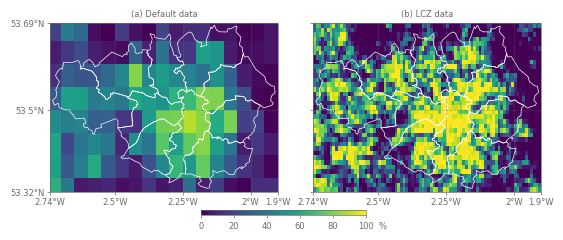

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5.5, 2.25), subplot_kw={'projection': proj})
ax = axs.flatten()
colormesh1 = axs[0].pcolormesh(lon, lat, def_urban, cmap=cmap, vmin=0, vmax=100)
colormesh2 = axs[1].pcolormesh(lon, lat, lcz_urban, cmap=cmap, vmin=0, vmax=100)
for i in range(2):
    #gdf_greater_manchester.dissolve().plot(ax=axs[i], edgecolor='white', linewidth = linewidth, facecolor='none')
    gdf_greater_manchester.plot(ax=axs[i], edgecolor='white', linewidth = linewidth, facecolor='none')
    ax[i].set_extent(extent)
    ax[i].set_xticks(xticks, crs = proj)
    if i==0:
        ax[i].tick_params(axis='y', which = 'both', left=True, right=False, labelleft=True, labelsize=labelsize, length=2, pad = pad, width = boundarywidth,colors=labelcolor) 
    else:
        ax[i].tick_params(axis='y', which = 'both', left=True, right=False, labelleft=False, labelsize=labelsize, length=2, pad = pad, width = boundarywidth,colors=labelcolor) 
    ax[i].set_yticks(yticks, crs = proj)
    ax[i].xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax[i].yaxis.set_major_formatter(LatitudeFormatter())
    ax[i].tick_params(axis='both', labelsize=labelsize, length=2, pad = pad, width = boundarywidth,colors=labelcolor)
    ax[i].grid('both', linewidth=linewidth, color=labelcolor, alpha=alpha, linestyle='--')
    ax[i].set_title(title_list[i], fontsize=fontsize,color=labelcolor, pad = padding)
    for spine in ax[i].spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor)

cbar = plt.colorbar(colormesh1,ax=axs, orientation='horizontal',location='bottom', pad=0.01, extend='neither', shrink=0.8, fraction=0.03, aspect=30)
cbar.ax.tick_params(length=2,labelsize=labelsize, pad = pad, width=boundarywidth, colors=labelcolor)
cbar.outline.set_linewidth(boundarywidth)
cbar.outline.set_edgecolor(labelcolor)
cbar.ax.yaxis.label.set_color(labelcolor)
cbar.ax.set_position([0.35, -0.4, 0.3, 0.5])
cbar.set_label('%', fontsize=labelsize, color=labelcolor)
cbar.ax.xaxis.set_label_coords(1.1, -1)

plt.subplots_adjust(left=0.075, right=0.97, bottom=0.18, top=0.93, wspace=0.15)         
# Show the figure
fig.savefig(output_dir + 'lnd_surf.png', dpi=300)  
fig.savefig(output_dir + 'lnd_surf.pdf', dpi=600)

# Description

In [73]:
def_urban.max()

<xarray.DataArray 'PCT_URBAN' ()> Size: 8B
array(88.8395023)

In [4]:
# standard surface data with 3 urban classes
def_srf = xr.open_dataset(home_path + 'manchester/lnd_surf/surfdata_001x001_MCR_SSP3-7.0_2022_78pfts_c240930.nc')
def_srf

<xarray.Dataset> Size: 109MB
Dimensions:                  (lsmlat: 37, lsmlon: 84, nlevsoi: 10, numurbl: 3,
                              numrad: 2, nlevurb: 10, nglcecp1: 11, nglcec: 10,
                              cft: 64, natpft: 15, time: 12, lsmpft: 79)
Coordinates:
  * natpft                   (natpft) int32 60B 0 1 2 3 4 5 ... 9 10 11 12 13 14
  * cft                      (cft) int32 256B 15 16 17 18 19 ... 74 75 76 77 78
  * time                     (time) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: lsmlat, lsmlon, nlevsoi, numurbl, numrad,
                                nlevurb, nglcecp1, nglcec, lsmpft
Data variables: (12/82)
    LONGXY                   (lsmlat, lsmlon) float64 25kB ...
    LATIXY                   (lsmlat, lsmlon) float64 25kB ...
    mxsoil_color             int32 4B ...
    SOIL_COLOR               (lsmlat, lsmlon) int32 12kB ...
    PCT_SAND                 (nlevsoi, lsmlat, lsmlon) float32 124kB ...
    PCT_CLAY                 (nlevsoi, lsmlat, lsmlon) float32 124kB ...
    ...                       ...
    PCT_NAT_PFT              (natpft, lsmlat, lsmlon) float64 373kB ...
    PCT_CFT                  (cft, lsmlat, lsmlon) float64 2MB ...
    MONTHLY_LAI              (time, lsmpft, lsmlat, lsmlon) float64 24MB ...
    MONTHLY_SAI              (time, lsmpft, lsmlat, lsmlon) float64 24MB ...
    MONTHLY_HEIGHT_TOP       (time, lsmpft, lsmlat, lsmlon) float64 24MB ...
    MONTHLY_HEIGHT_BOT       (time, lsmpft, lsmlat, lsmlon) float64 24MB ...
Attributes: (12/45)
    Conventions:                              NCAR-CESM
    History_Log:                              created on: 09-30-24 17:42:58
    Source:                                   Community Land Model: CLM5
    Version:                                  ctsm5.2.003
    Logname:                                  yuansun
    Host:                                     ln01
    ...                                       ...
    lai_raw_data_file_name:                   mksrf_pftlaihgt_ctsm52_histLUH2...
    soil_color_raw_data_file_name:            mksrf_soilcolor_ctsm52_histLUH2...
    soil_texture_mapunit_raw_data_file_name:  mksrf_soil_mapunits_5x5min_WISE...
    soil_texture_lookup_raw_data_file_name:   mksrf_soil_lookup.10level.WISE....
    fmax_raw_data_file_name:                  mksrf_fmax_0.125x0.125_c200220.nc
    VOC_EF_raw_data_file_name:                mksrf_vocef_0.5x0.5_simyr2000.c...

In [9]:
def_srf['PCT_URBAN'].where(def_srf['PCT_URBAN']>0).min()

<xarray.DataArray 'PCT_URBAN' ()> Size: 8B
array(2.0720618e-06)

In [6]:
# filter variables containing 'numurbl' dimension
filtered_vars = {var: def_srf[var] for var in def_srf.data_vars if 'numurbl' in def_srf[var].dims}
filtered_dataset = xr.Dataset(filtered_vars)
filtered_dataset

<xarray.Dataset> Size: 7MB
Dimensions:          (numurbl: 3, lsmlat: 37, lsmlon: 84, numrad: 2, nlevurb: 10)
Dimensions without coordinates: numurbl, lsmlat, lsmlon, numrad, nlevurb
Data variables: (12/28)
    CANYON_HWR       (numurbl, lsmlat, lsmlon) float64 75kB ...
    EM_IMPROAD       (numurbl, lsmlat, lsmlon) float64 75kB ...
    EM_PERROAD       (numurbl, lsmlat, lsmlon) float64 75kB ...
    EM_ROOF          (numurbl, lsmlat, lsmlon) float64 75kB ...
    EM_WALL          (numurbl, lsmlat, lsmlon) float64 75kB ...
    HT_ROOF          (numurbl, lsmlat, lsmlon) float64 75kB ...
    ...               ...
    TK_IMPROAD       (nlevurb, numurbl, lsmlat, lsmlon) float64 746kB ...
    CV_ROOF          (nlevurb, numurbl, lsmlat, lsmlon) float64 746kB ...
    CV_WALL          (nlevurb, numurbl, lsmlat, lsmlon) float64 746kB ...
    CV_IMPROAD       (nlevurb, numurbl, lsmlat, lsmlon) float64 746kB ...
    NLEV_IMPROAD     (numurbl, lsmlat, lsmlon) int32 37kB ...
    PCT_URBAN        (numurbl, lsmlat, lsmlon) float64 75kB ...

In [40]:
for i in range(10):
    print(filtered_dataset['TK_ROOF'][i,2].mean().item())

1.2000000476837158
0.029999999329447746
0.15000000596046448
0.029999999329447746
0.029999999329447746
0.029999999329447746
0.03999999910593033
0.03999999910593033
0.03999999910593033
0.1599999964237213


In [41]:
filtered_dataset['TK_ROOF']

<xarray.DataArray 'TK_ROOF' (nlevurb: 10, numurbl: 3, lsmlat: 37, lsmlon: 84)> Size: 746kB
[93240 values with dtype=float64]
Dimensions without coordinates: nlevurb, numurbl, lsmlat, lsmlon
Attributes:
    long_name:  thermal conductivity of roof
    units:      W/m*K

In [45]:
filtered_dataset[variable].units

'unitless'

In [47]:
for variable in filtered_dataset.data_vars:
    if variable == 'PCT_URBAN':
        continue
    if filtered_dataset[variable].ndim ==3:
        hd_val = np.round(np.unique(filtered_dataset[variable][1]).item(),2)
        md_val = np.round(np.unique(filtered_dataset[variable][2]).item(),2)
        print(variable + ' ' + filtered_dataset[variable].long_name + ' ' + filtered_dataset[variable].units + ' : ' + str(hd_val) + ', ' + str(md_val))
    else:
        hd_val = np.round(np.unique(filtered_dataset[variable][0, 1]).item(),2)
        md_val = np.round(np.unique(filtered_dataset[variable][0, 2]).item(),2)
        print(variable + ' ' + filtered_dataset[variable].long_name + ' ' + filtered_dataset[variable].units + ' : ' + str(hd_val) + ', ' + str(md_val))

CANYON_HWR canyon height to width ratio unitless : 1.6, 0.75
EM_IMPROAD emissivity of impervious road unitless : 0.91, 0.91
EM_PERROAD emissivity of pervious road unitless : 0.95, 0.95
EM_ROOF emissivity of roof unitless : 0.9, 0.9
EM_WALL emissivity of wall unitless : 0.91, 0.91
HT_ROOF height of roof meters : 40.0, 15.0
THICK_ROOF thickness of roof meters : 0.15, 0.15
THICK_WALL thickness of wall meters : 0.28, 0.28
T_BUILDING_MIN minimum interior building temperature K : 290.1, 290.1
WIND_HGT_CANYON height of wind in canyon meters : 20.0, 7.5
WTLUNIT_ROOF fraction of roof unitless : 0.6, 0.35
WTROAD_PERV fraction of pervious road unitless : 0.38, 0.69
ALB_IMPROAD_DIR direct albedo of impervious road unitless : 0.13, 0.13
ALB_IMPROAD_DIF diffuse albedo of impervious road unitless : 0.13, 0.13
ALB_PERROAD_DIR direct albedo of pervious road unitless : 0.08, 0.08
ALB_PERROAD_DIF diffuse albedo of pervious road unitless : 0.08, 0.08
ALB_ROOF_DIR direct albedo of roof unitless : 0.23, 0.2